<img src='./Unemployement-in-India.jpg' style='height: 300px; width:1100px'>

#### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

%matplotlib inline

#### Setting Graph Style

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (8, 4)
# plt.rcParams['figure.facecolor'] = '#00000000'

#### Loading Dataset from csv file

In [3]:
df = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


#### Rename the columns

In [4]:
new_column_names = {
     'Region': "State", 
     ' Date': "Date", 
     ' Frequency': "Frequency", 
     ' Estimated Unemployment Rate (%)': "Unemployment_Rate",
     ' Estimated Employed': "Estimated_Employed", 
     ' Estimated Labour Participation Rate (%)': "Labour_Participation_Rate",
     'Region.1': "Area"
}
df.rename(columns=new_column_names, inplace=True)

df.head()

,State,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


#### Creating month Cloumn from Date

In [5]:
df['month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,State,Date,Frequency,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,Area,longitude,latitude,month
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,1
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,2
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,3
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,4
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,5


In [6]:
df.isnull().sum()

State                        0
Date                         0
Frequency                    0
Unemployment_Rate            0
Estimated_Employed           0
Labour_Participation_Rate    0
Area                         0
longitude                    0
latitude                     0
month                        0
dtype: int64

In [7]:
# Handling missing values: fill NaN with mean for numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [8]:
# Handling missing values: fill NaN with mode for categorical columns
categorical_columns = df.select_dtypes(include=[object]).columns
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [9]:
df.isnull().sum()

State                        0
Date                         0
Frequency                    0
Unemployment_Rate            0
Estimated_Employed           0
Labour_Participation_Rate    0
Area                         0
longitude                    0
latitude                     0
month                        0
dtype: int64

#### Summary statistics of the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      267 non-null    object 
 1   Date                       267 non-null    object 
 2   Frequency                  267 non-null    object 
 3   Unemployment_Rate          267 non-null    float64
 4   Estimated_Employed         267 non-null    int64  
 5   Labour_Participation_Rate  267 non-null    float64
 6   Area                       267 non-null    object 
 7   longitude                  267 non-null    float64
 8   latitude                   267 non-null    float64
 9   month                      267 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(4)
memory usage: 19.9+ KB


In [11]:
df.describe()

,Unemployment_Rate,Estimated_Employed,Labour_Participation_Rate,longitude,latitude,month
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425,5.535581
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738,2.870915
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400,1.000000
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600,3.000000
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300,6.000000
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900,8.000000
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600,10.000000


#### Correlation between the Features of the Dataset

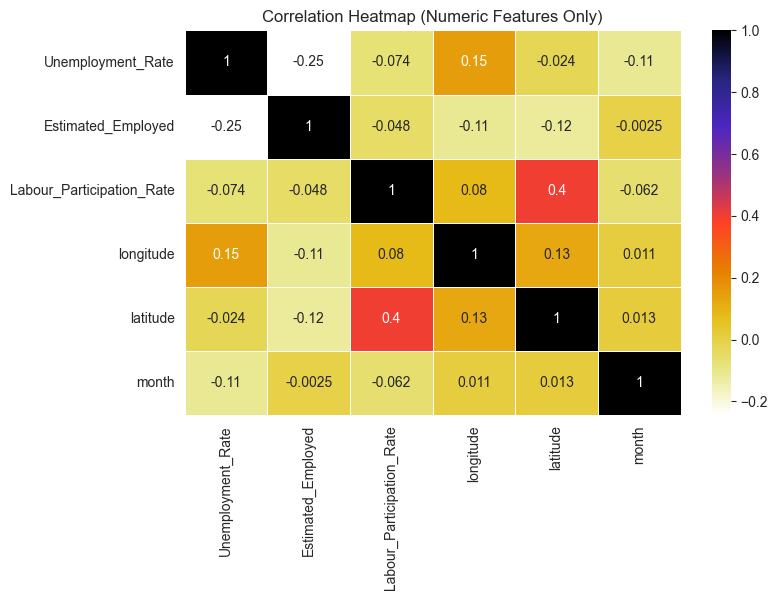

In [12]:
plt.figure(figsize=(8, 5))

# Select only numeric columns to avoid string conversion errors
numeric_df = df.select_dtypes(include=['number'])

# Plot the heatmap
sns.heatmap(numeric_df.corr(), cmap="CMRmap_r", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

### Average Estimated Unemployment Rate in Each State

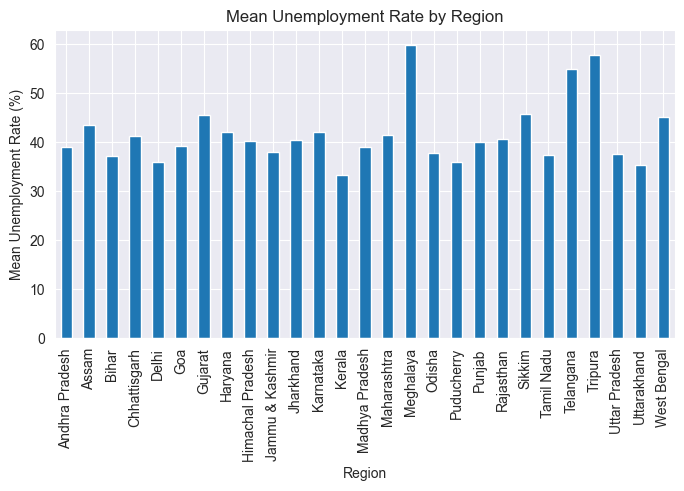

In [13]:
# Grouping the data by Region and calculating mean unemployment rate
mean_unemployment_by_region = df.groupby("State")["Labour_Participation_Rate"].mean()
pd.DataFrame(mean_unemployment_by_region)

# Plotting mean unemployment rate by region
mean_unemployment_by_region.plot(kind="bar")

plt.title("Mean Unemployment Rate by Region")
plt.xlabel("Region")
plt.ylabel("Mean Unemployment Rate (%)")
plt.show()

In [14]:
l = pd.DataFrame(mean_unemployment_by_region)
l = l.sort_values(by=["Labour_Participation_Rate"])
l = l.reset_index()

pd.DataFrame(
    {
        "State": [l.min().iloc[0], l.max().iloc[0]],
        "Mean Unemployment Rate": [l.min().iloc[1], l.max().iloc[1]]
    },
    index=["Min", "Max"]
)

,State,Mean Unemployment Rate
Min,Andhra Pradesh,33.382
Max,West Bengal,59.859


### Total Employed in Each State

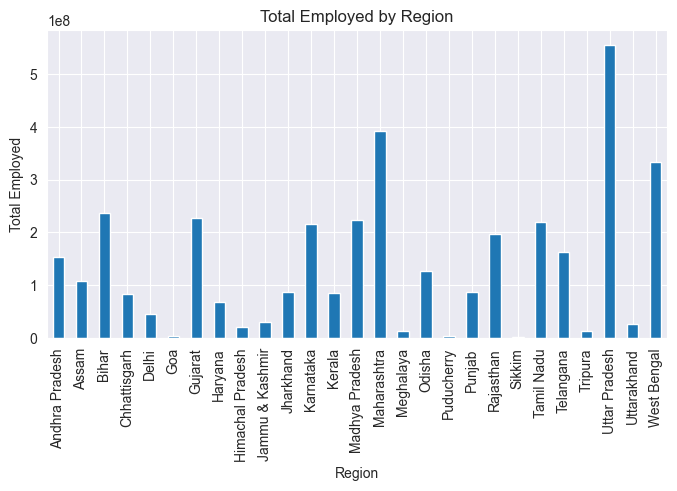

In [15]:
# Grouping the data by Region and calculating total employed
total_employed_by_region = df.groupby("State")["Estimated_Employed"].sum()
pd.DataFrame(total_employed_by_region).reset_index()

# Plotting total employed by region
total_employed_by_region.plot(kind="bar")
plt.title("Total Employed by Region")
plt.xlabel("Region")
plt.ylabel("Total Employed")
plt.show()

### Estimated Employed in Each Regions

<Axes: title={'center': 'Unemployment in India'}, xlabel='Estimated_Employed', ylabel='Count'>

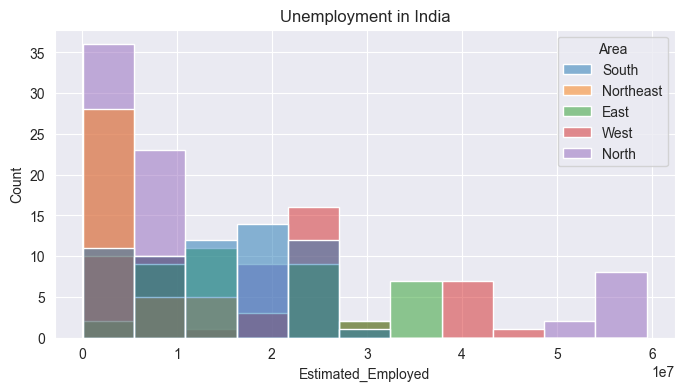

In [16]:
plt.title("Unemployment in India")
sns.histplot(x="Estimated_Employed", hue="Area", data=df)

### Unemployment Rate according to the different Region

<Axes: title={'center': ' Unemployment Rate'}, xlabel='Unemployment_Rate', ylabel='Count'>

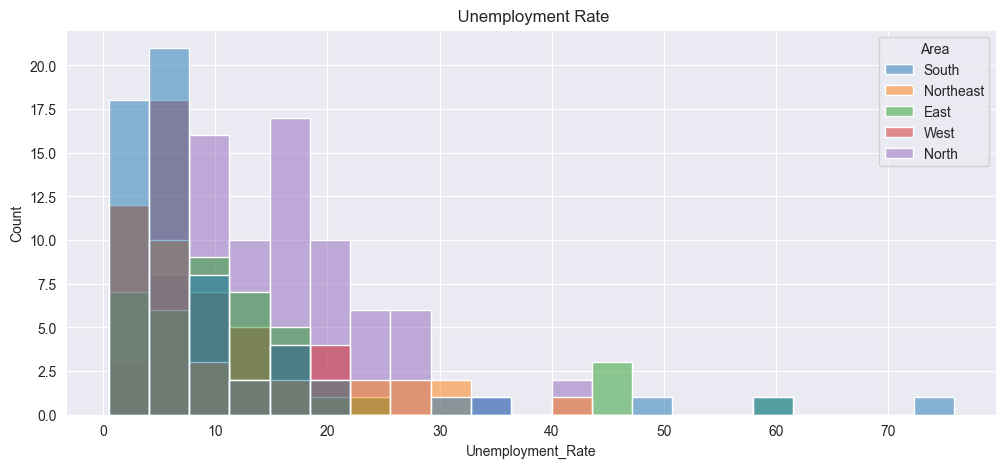

In [17]:
plt.figure(figsize=(12, 5))
plt.title(" Unemployment Rate")
sns.histplot(x="Unemployment_Rate", hue="Area", data=df)

<Axes: title={'center': 'Labour Participation Rate'}, xlabel='Labour_Participation_Rate', ylabel='Count'>

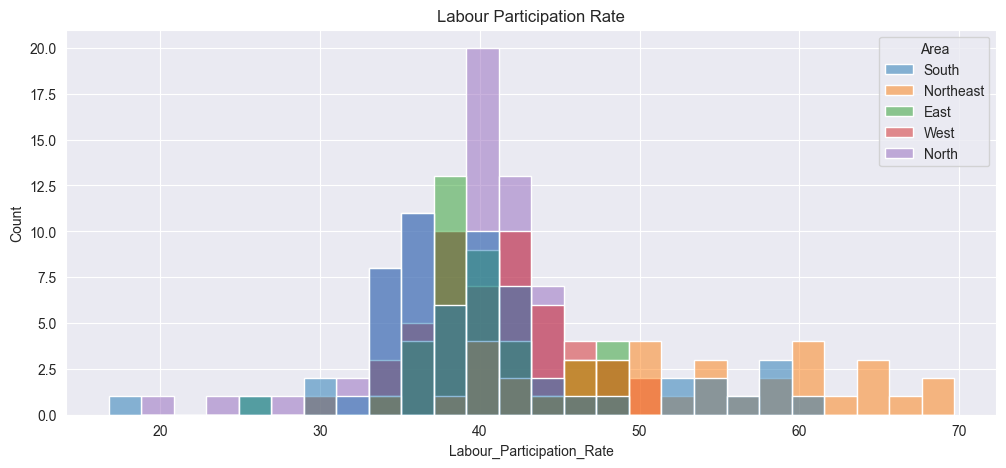

In [18]:
plt.figure(figsize=(12, 5))
plt.title("Labour Participation Rate")
sns.histplot(x="Labour_Participation_Rate", hue="Area", data=df)

### Sunburst to Analysis the Estimated Unemployment Rate

In [19]:
data = df[["State", "Area", "Unemployment_Rate"]]

fig = px.sunburst(data, 
                  path=["Area", "State"], 
                  values="Unemployment_Rate", 
                  width=600, height=600,  
                  title="Unemployment Rate in India"
).show()

In [20]:
#mean_unemployment_by_region = df.groupby("State")["Labour_Participation_Rate"].mean()

monthly_unemployment_rate = df.groupby("month")["Unemployment_Rate"].mean()
monthly_unemployment_rate = pd.DataFrame(monthly_unemployment_rate).reset_index()

monthly_unemployment_rate

,month,Unemployment_Rate
0,1,9.196538
1,2,9.266154
2,3,10.782593
3,4,22.236154
4,5,23.244444
5,6,10.911111
6,7,9.834444
7,8,10.313333
8,9,8.705926
9,10,8.026296


C:\Users\Hp\AppData\Local\Temp\ipykernel_29012\3456142517.py:2: UserWarning:

Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



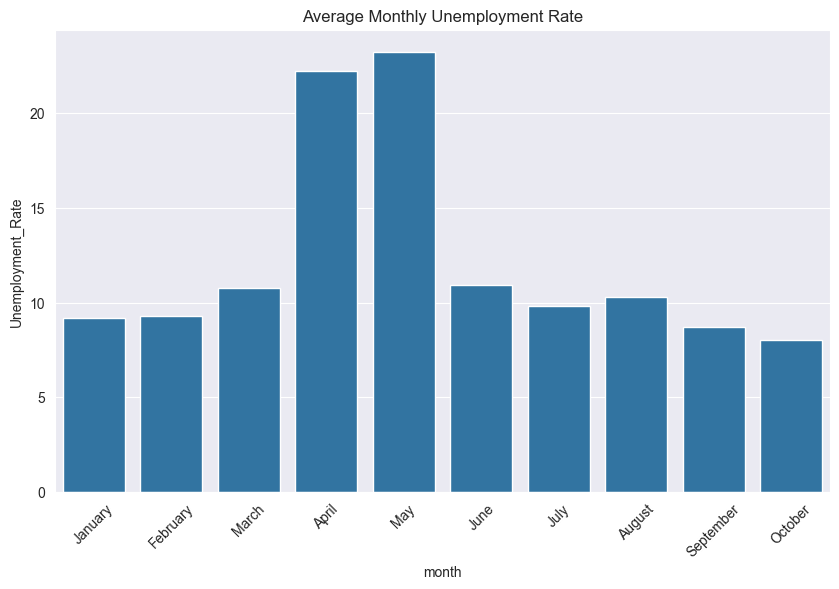

,month,Unemployment_Rate
0,January,9.196538
1,February,9.266154
2,March,10.782593
3,April,22.236154
4,May,23.244444


In [21]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month name
df['month'] = df['Date'].dt.strftime('%B')

# Group by month and compute mean unemployment rate
monthly_unemployment_rate = df.groupby('month', sort=False)['Unemployment_Rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_unemployment_rate, x='month', y='Unemployment_Rate')
plt.xticks(rotation=45)
plt.title("Average Monthly Unemployment Rate")
plt.show()
monthly_unemployment_rate.head()